## [지도학습/회귀]Linear Regression

### 0. 개념

**Linear Model(선형 모델)**
- 다양한 선형 모델이 존재
- 회귀 분석은 예측 값이 평균과 같이 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법 이용
- 입력 특성에 대한 선형 함수를 만들어 예측 수행
- 분류와 회귀에 모두 사용 가능
  
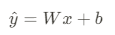

> 🌟**선형 함수를 만든다** => 학습하고자 하는 데이터 포인트를 가장 잘 나타낼 수 있는 직선을 구하는 것
> 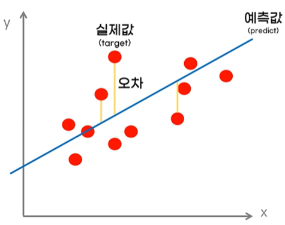
> <br>
> =>평균제곱오차가 최소인 w와 b 찾기

### 1. 문제정의
- 목표 : <U>**스마트홈 시스템을 국외 전세계적으로 보급**</U>


- **BX** : 외국 주택시장의 동향 및 가격분석, 스마트홈 시스템 설치환경, 주택 가격과의 상관관계 확인을 통해 스마트홈 시스템의 비즈니스 전략 수립, 스마트홈 시스템 대중화, 초개인화
    - 추후 데이터 추가
        - 스마트 홈 시스템 준비 상태 요소
        1. 네트워크 인프라
         - 고속 인터넷 연결: 주택 내 고속 인터넷 연결 상태.
         - Wi-Fi 커버리지: 주택 전체에 걸친 안정적인 Wi-Fi 커버리지.
        2. 전기 인프라
         - 전기 배선: 최신 표준에 따른 전기 배선 상태.
         - 스마트 조명: 스마트 조명 시스템 설치 준비 상태.
         - 스마트 보안 시스템: 스마트 도어락, CCTV 등 보안 시스템 설치 준비 상태.
        3. 기타 편의 시설
         - 충전소 준비: 전기차 충전소 설치 준비 상태.
         - 에너지 관리 시스템: 에너지 효율적인 주택 관리 시스템 설치 준비 상태. (태양열)


- **CX** : <U>외국 고객이 중요하게 생각하는 주택 특성 확인(방의 개수, 지리적 위치, 차고, 크기 등)</U>, 개인의 가치관(안전, 편리함, 원격조정, 건강, 디자인, 의사소통 등)
    - 추후 데이터 추가
      - 스마트홈 시스템 설치 후에 만족 데이터 수집 및 분석, 추가로 원하는 기기 분석
- **DX** : 국외전용 앱 개발, 외국 주택 관리에 특화된 가전 제품 개발(잔디깎이 로봇, 스마트 벽난로)

---

- **Trigger** : 외국 주택환경에서 고객이 불편함을 느끼는 요소와 한국의 스마트 가전기기에 대한 인식 및 만족감
- **Accelerator** : 고객이 중요하게 생각하는 다양한 주택 특성 확인, 개인이 중요시 여기는 주택환경의 가치관을 확인
- **Tracker** : 스마트 홈 시스템 설치 이후 고객의 행동 변화를 모니터링 예를 들어, 에너지 소비 패턴(사용했을때 얼마나 절약이 되었는지)이나 스마트 기기 사용 빈도, 스마트 홈 시스템 설치 전후의 주택 가격 변화 및 고객 만족도 추적

### 2. 데이터 수집
1. 데이터 불러오기
   - melb_data.csv
2. 데이터 정보 확인
   - 데이터 수 + column의 수
   - 결측치 여부 -> ML학습을 위해 결측치가 있으면 안됨
   - 데이터 타입 -> 문자열 데이터는 ML학습을 할 수 없음 -> 숫자 형태로 변경
3. 기술통계량 확인 : 이상치 의심

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 데이터 불러오기
house_data = pd.read_csv('data/melb_data.csv')
house_data

In [ ]:
# 데이터 정보 확인
house_data.info()

# 확인사항
# 1. 데이터 수 + column의 수
# 2. 결측치 여부 -> ML학습을 위해 결측치가 있으면 안됨
# 3. 데이터 타입 -> 문자열 데이터는 ML학습을 할 수 없음 -> 숫자 형태로 변경

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Suburb: 주택이 위치한 교외 지역의 이름  
Address: 주택의 주소  
Rooms: 주택의 방 개수  
Type: 주택 유형 (h: 주택, u: 유닛, t: 타운하우스)  
Price: 주택 가격  
Method: 판매 방법 (S: 매매, SP: 매매 후 가격 공개, PI: 경매 전에 가격, VB: 경매 후 가격 공개)  
SellerG: 판매 대행 부동산 중개인의 이름  
Date: 판매 날짜  
Distance: 주택이 CBD (중심 업무 지구)에서 떨어진 거리 (킬로미터 단위)  
Postcode: 우편번호  
Bedroom2: 주택의 침실 개수 (2개의 침실을 갖춘 주택)  
Bathroom: 주택의 욕실 개수  
Car: 주차 가능한 자동차 수  
Landsize: 대지 면적 (평방 미터 단위)  
BuildingArea: 건축 면적 (평방 미터 단위)  
YearBuilt: 주택이 건축된 연도  
CouncilArea: 관할 구역  
Lattitude: 주택의 위도  
Longtitude: 주택의 경도  
Regionname: 지역 이름  
Propertycount: 지역 내의 부동산 개수  

In [ ]:
# 결측지가 있는 컬럼 확인
house_data.isnull().sum().sort_values(ascending = False)

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Suburb              0
Bathroom            0
Regionname          0
Longtitude          0
Lattitude           0
Landsize            0
Bedroom2            0
Address             0
Postcode            0
Distance            0
Date                0
SellerG             0
Method              0
Price               0
Type                0
Rooms               0
Propertycount       0
dtype: int64

In [ ]:
# 기술통계량 확인
house_data.describe()

# 중위수와 평균값을 비교 -> 차이가 크다면 이상치 의심

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


### 3. EDA 탐색적 데이터 분석
- 기술통계량 확인
- 시각화
- **결측치 처리** : CouncilArea

#### IQR(Inter Quantile Range)

- 데이터의 분포를 사분위수를 통해 알아본다.
- IQR = Q3 - Q1
- 이상치 처리가 중요한 작업이다.
- 최댓값(상위경계)과 최솟값(하위경계)을 벗어나는 수를 이상치라고 판단.
- 이상치를 처리할 것인지 여부를 결정하는 것은 데이터 분석가의 판단.

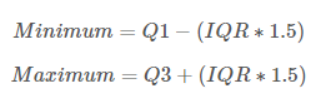


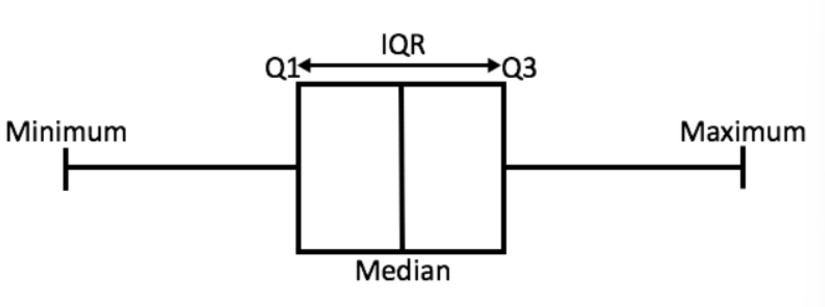



#### 방의 개수에 따른 집값의 변화 확인
- boxplot으로 중앙값, 분위수를 통해 시각화
- 방의 개수가 늘어날 수록 price상승 / 5개가 넘어가면 영향을 크게 미치지 않는다
- 이상치의 개수가 많지 않으므로 처리 X

<Axes: xlabel='Rooms', ylabel='Price'>

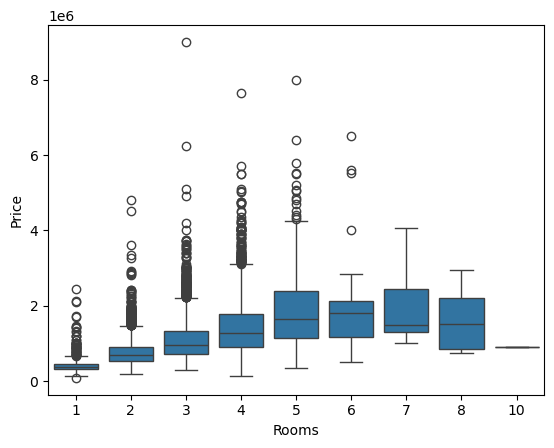

In [ ]:
sns.boxplot(x = "Rooms", y = "Price", data = house_data)

In [ ]:
# Type 데이터 확인
house_data['Type'].unique() # Series 데이터 타입

array(['h', 'u', 't'], dtype=object)

#### 주택 타입(Type)에 따른 가격(Price) 평균
- h(주택) 타입의 주택이 가격이 높게 책정

<Axes: xlabel='Type'>

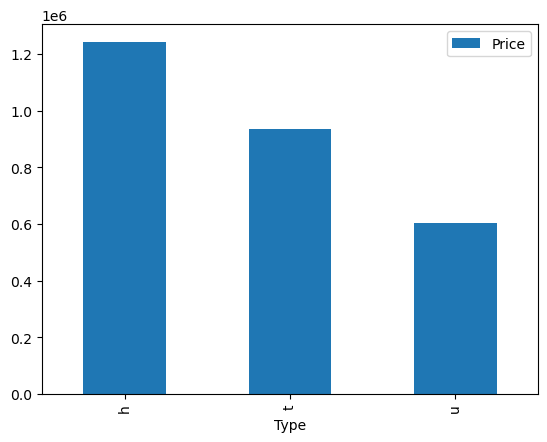

In [ ]:
house_data[['Type', 'Price']].groupby('Type').mean().plot(kind = 'bar')

#### 관할 구역(CouncilArea)에 따른 주택 분포수 확인
- 관할 구역의 빈도수로 결측치를 채우기에는 애매한 부분이 많다
- 빈도수로 채우려고 했지만, 빈도수가 다른 것과 특징적으로 차이가 나아야 한다.
하지만, Moreland와 Boroondara와 차이가 얼마 나지 않아 -> 구분하기 힘듬
- 1000개 데이터 중 5개 결측치 발생 -> Moreland 가 80% 빈도를 차지하면 가능
- 결측지가 적고, 대푯값(평균, 중앙값, 최빈값)이 뚜렷할때 사용한다

<Axes: xlabel='count', ylabel='CouncilArea'>

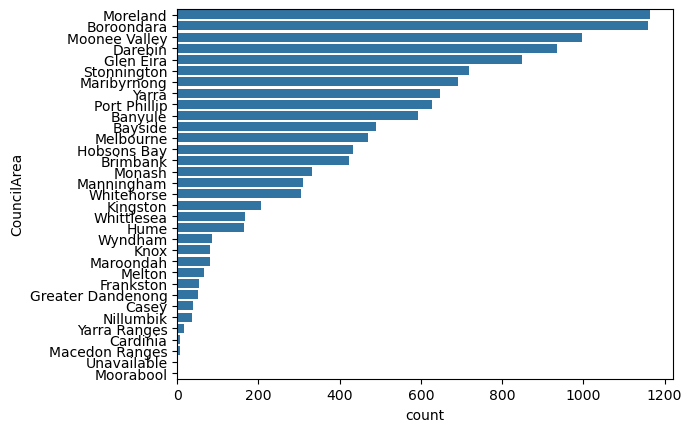

In [ ]:
sns.countplot(y = 'CouncilArea', data = house_data,
              order = house_data['CouncilArea'].value_counts().index)

In [ ]:
# 전체 행 데이터 출력
pd.set_option('display.max_rows()', None)

#### 지역(Suburb)과 관할구역(CouncilArea) 매칭시켜 결측치 채우기
-  단순 통계량이 아닌 특성 간 관계가 있는 데이터로 결측치 채우기!
-  피봇테이블 : 데이터들의 요약정보를 출력하고 싶을 때 사용하는 테이블(count, sum, mean)

In [ ]:
house_data.pivot_table(index = ['Suburb', 'CouncilArea'],
                      aggfunc = 'count',
                      values = 'Rooms')

In [ ]:
# 지역(Suburb)을 그룹화하여 최빈 데이터만 추출
# 지역과 관할구역을 1:1 매칭(매칭 데이터가 없으면 최빈값으로 채우기)
mode_data = house_data.groupby('Suburb')['CouncilArea'].agg(pd.Series.mode)
mode_data

#### 결측치를 채워주기 위한 사용자 정의함수
- 관할구역(CouncilArea)데이터가 있다면 그대로 추출
- 없다면? 지역(Suburb)을 참조하여 관할구역 추출

In [ ]:
def fill_na(row):
    if pd.isnull(row['CouncilArea']):
        return mode_data[row['Suburb']]
    else:
        return row['CouncilArea']

In [ ]:
# apply : DataFrame에 함수를 적용할 때 도와주는 기능(행, 열)
house_data['CouncilArea'] = house_data.apply(fill_na, axis=1)

In [ ]:
# CouncilArea 결측치 0 확인
house_data['CouncilArea'].isnull().sum()

0

In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    13580 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

### 3. 데이터 분리
- x(문제), y(정답)
    - 주의사항 : 문제 데이터는 늘 2차원 데이터여야 한다
- train(학습용), test(평가용)
    - sklearn에서 제공하는 분리도구 사용!

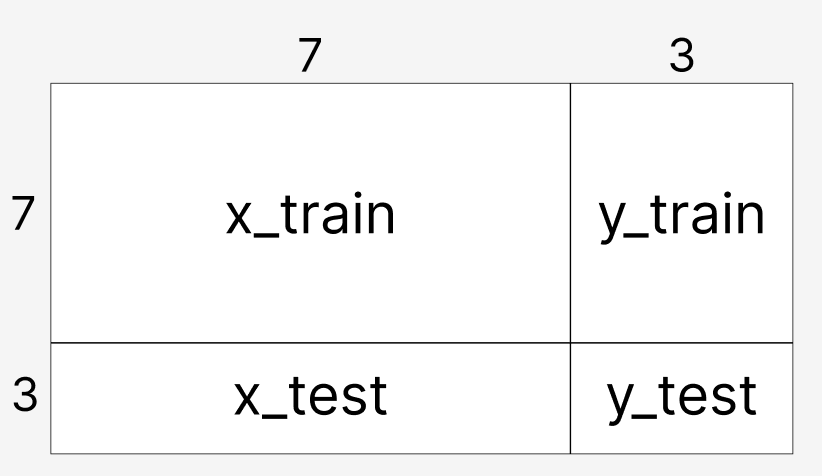

#### 상관관계
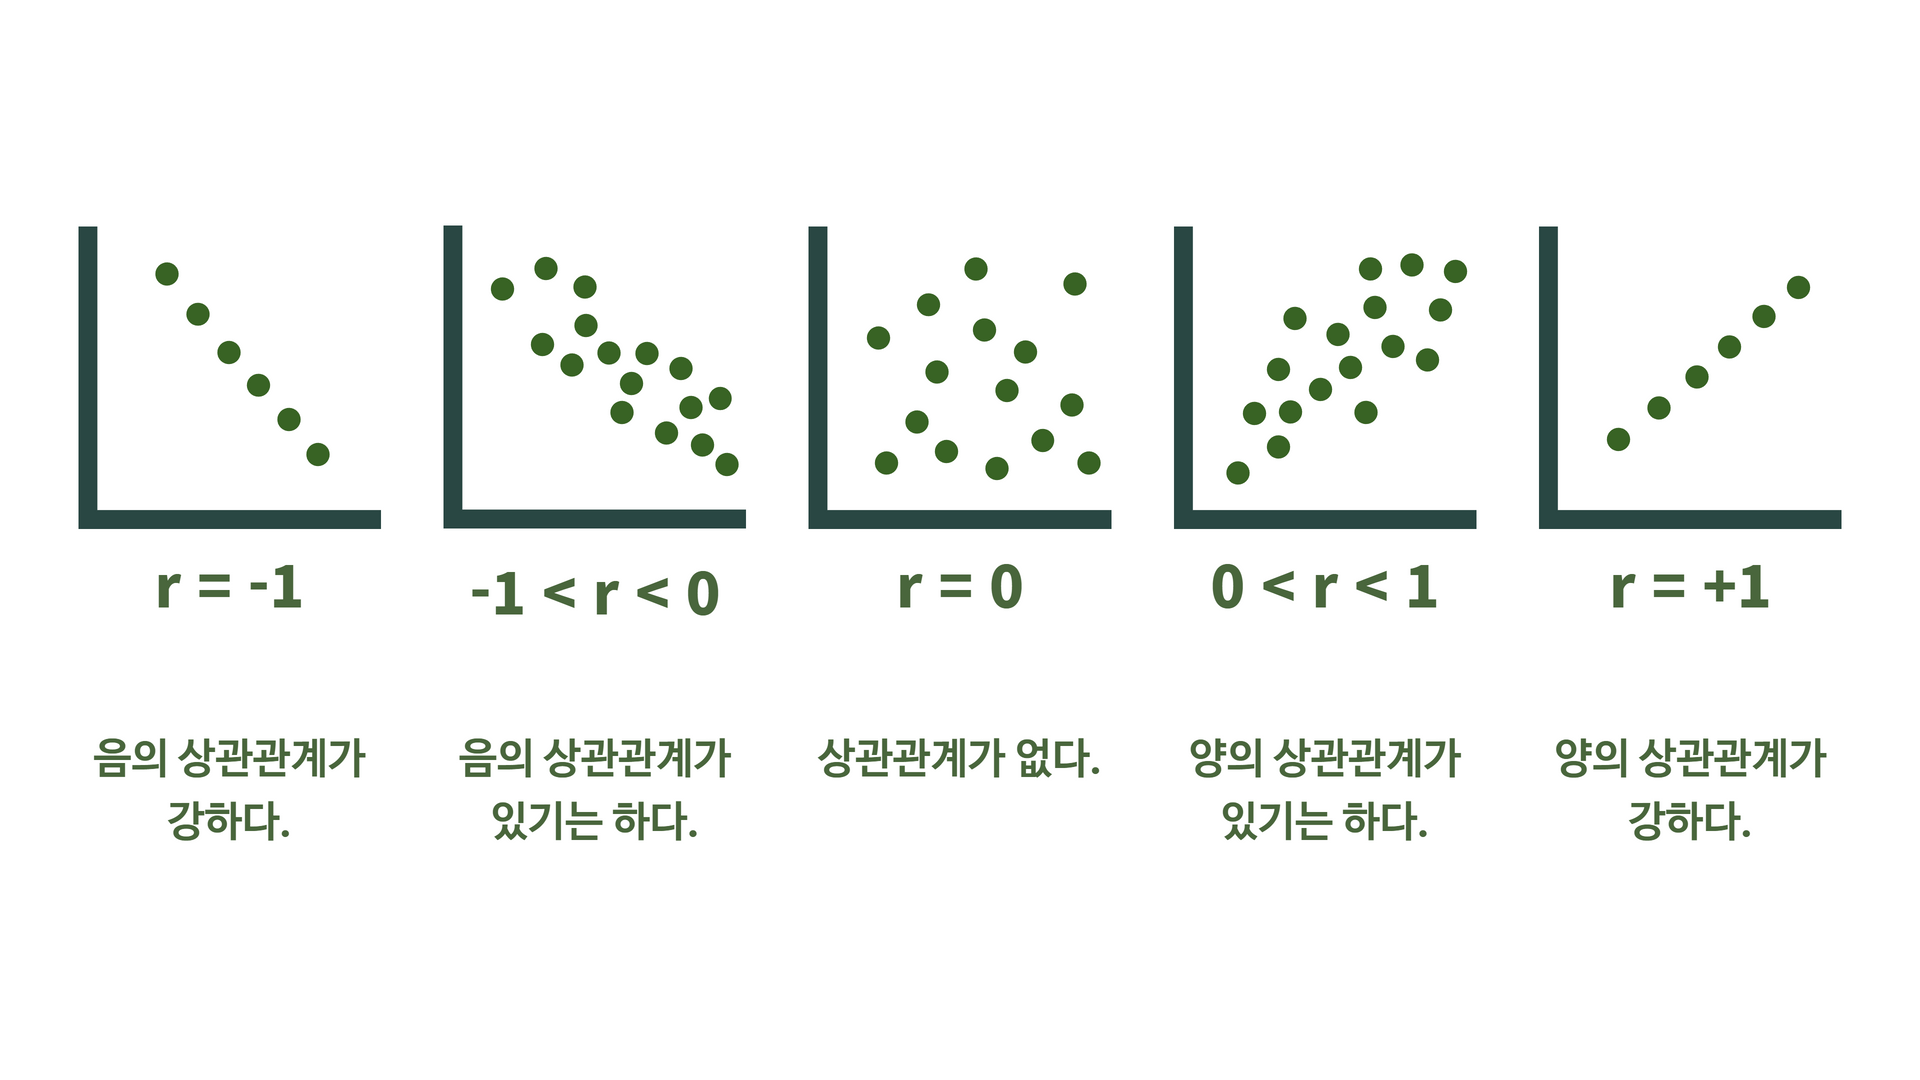

In [ ]:
# 입력 특성으로 사용할 컬럼 확인
# 상관관계 확인 : 숫자 데이터만 가능
house_corr = house_data.corr(numeric_only = True)

In [ ]:
# 상관관계 정렬
house_corr['Price'].abs().sort_values(ascending = False)

Price            1.000000
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
YearBuilt        0.323617
Car              0.238979
Lattitude        0.212934
Longtitude       0.203656
Distance         0.162522
Postcode         0.107867
BuildingArea     0.090981
Propertycount    0.042153
Landsize         0.037507
Name: Price, dtype: float64

In [ ]:
feature_name = ['Rooms', 'Bedroom2', 'Bathroom', 'Lattitude', 'Longtitude', 'Distance', 'CouncilArea', 'Type']

In [ ]:
# 모든 행 출력하기 초기화
pd.reset_option('display.max_rows')  # reset

In [ ]:
house_data[feature_name]

,Rooms,Bedroom2,Bathroom,Lattitude,Longtitude,Distance,CouncilArea,Type
0,2,2.0,1.0,-37.79960,144.99840,2.5,Yarra,h
1,2,2.0,1.0,-37.80790,144.99340,2.5,Yarra,h
2,3,3.0,2.0,-37.80930,144.99440,2.5,Yarra,h
3,3,3.0,2.0,-37.79690,144.99690,2.5,Yarra,h
4,4,3.0,1.0,-37.80720,144.99410,2.5,Yarra,h
...,...,...,...,...,...,...,...,...
13575,4,4.0,2.0,-37.90562,145.16761,16.7,Monash,h
13576,3,3.0,2.0,-37.85927,144.87904,6.8,Hobsons Bay,h
13577,3,3.0,2.0,-37.85274,144.88738,6.8,Hobsons Bay,h
13578,4,4.0,1.0,-37.85908,144.89299,6.8,Hobsons Bay,h


#### train, test 데이터 분리

In [ ]:
# 문제 데이터
X = house_data[feature_name]  # 2차원
# 정답 데이터
y = house_data['Price']  # 1차원

In [ ]:
# train, test 분리
# 데이터를 랜덤샘플링 해서 나눠준다.
from sklearn.model_selection import train_test_split
# train_test_split(문제, 정답, 분리 비율, 랜덤 규칙 고정)
# x가 먼저 데이터를 만나게 된다
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [ ]:
# 크기 확인
X_train.shape

(9506, 8)

In [ ]:
# 데이터 크기 확인
print('훈련용 문제: ', X_train.shape)
print('훈련용 답: ', y_train.shape)
print('테스트용 문제: ', X_test.shape)
print('테스트용 답: ', y_test.shape)

훈련용 문제:  (9506, 8)
훈련용 답:  (9506,)
테스트용 문제:  (4074, 8)
테스트용 답:  (4074,)


In [ ]:
X_train

,Rooms,Bedroom2,Bathroom,Lattitude,Longtitude,Distance,CouncilArea,Type
13253,2,2.0,1.0,-37.77540,144.99275,5.3,Darebin,h
10772,3,3.0,2.0,-37.90583,145.07283,10.1,Glen Eira,h
10346,3,3.0,1.0,-37.86658,144.71221,18.4,Wyndham,h
522,2,2.0,1.0,-37.81520,145.08430,9.7,Boroondara,u
9143,3,3.0,2.0,-37.75582,144.91061,7.5,Moonee Valley,h
...,...,...,...,...,...,...,...,...
6528,3,3.0,1.0,-37.85870,144.88710,8.0,Hobsons Bay,h
2693,2,2.0,1.0,-37.80170,144.89570,6.4,Maribyrnong,u
8076,2,2.0,1.0,-37.77220,144.88070,8.7,Maribyrnong,t
3829,4,4.0,2.0,-37.88450,145.07200,11.2,Stonnington,h


#### 인코딩
- 범주형 데이터(문자형)를 수치형 데이터(숫자형)로 변환하는 방법
- **원핫인코딩(one-hot encoding)**
  - 하나의 컬럼의 유일한 범주형 데이터 개수만큼 컬럼을 생성하여 있으면 1, 없으면 0 출력
  - pd.get_dummies(X)

In [ ]:
pd.set_option("display.max_rows", None)  # 모든 행이 보인다
X["CouncilArea"]

In [ ]:
# [] -> 원핫인코딩 시 문제발생(특이케이스)
# [] 데이터 문자열로 변경 후 확인
X['CouncilArea'] = X['CouncilArea'].astype('str')

In [ ]:
# 불리언 색인, 불리언 인덱싱
# 원본데이터[조건]
# X['CouncilArea'] 에서 데이터가 '[]'인 데이터만 추출!
dd = X[X['CouncilArea'] == '[]']

In [ ]:
X.drop(dd.index, inplace = True)
y.drop(dd.index, inplace = True)

In [ ]:
X_one_hot = pd.get_dummies(X, dtype='int64')  # 0,1로 본다 -> dtype
X_one_hot

In [ ]:
# train, test 데이터로 분리 -> 15
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size=0.3, random_state=15)

In [ ]:
# 데이터 크기 확인
print('훈련용 문제: ', X_train.shape)
print('훈련용 답: ', y_train.shape)
print('테스트용 문제: ', X_test.shape)
print('테스트용 답: ', y_test.shape)

훈련용 문제:  (9501, 42)
훈련용 답:  (9501,)
테스트용 문제:  (4072, 42)
테스트용 답:  (4072,)


### 4. 모델링
- 모델 객체생성
- 모델 학습
- 모델 평가

In [ ]:
# 모델 불러오기
from sklearn.linear_model import LinearRegression # 선형회귀
# 객체 생성
linear_model = LinearRegression()

In [ ]:
# 모델 학습
# linear_model.fit(학습용 문제, 학습용 정답)
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 모델 평가
# linear_model.score(테스트용 문제, 테스트용 정답)
linear_model.score(X_test, y_test)

# R2score로 출력

0.6281281634114184

### 5. 회귀모델 평가 지표
- 분류 accuracy 정확도를 통해서 평가
    - 범주형 데이터이기 때문에 맞았는지 틀렸는지에 대한 척도가 정확함.
- 회귀는 연속형 데이터이기 때문에 오차 기반의 평가 진행
    - mse -> 학습시에도 사용되지만 평가지표로도 사용된다!  

#### 평가지표 4가지
- **MSE**(mean_squared_error) : 평균제곱오차, 오차가 작을수록 잘 예측한 모델
- **RMSE**(Root) : mse 값에 루트를 씌운 값으로 mse의 단위문제 해결
- **MAE**(mean_absolute_error) : 절댓값을 통하여 오차를 구함, 오차에 덜 민감
- **R2score** : 분산을 기준으로 예측 성능평가 -> 정규화된 값으로 변환하여 평가
  
  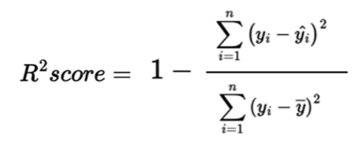
  - 0에 가까우면 평균적인 성능
  - 1에 가까우면 성능 좋음
  - 음수 : 평균오차보다 큰 오차 -> 성능이 떨어지는 모델

In [ ]:
# MSE
from sklearn.metrics import mean_squared_error as mse
# mse(실제 정답 값, 예측 정답 값)
pre = linear_model.predict(X_test)  # 집값을 예측한 집값
mse_score = mse(y_test, pre)
mse_score

158769720966.30487

In [ ]:
# RMSE (루트)
mse_score ** 0.5

# => 39만 달러 정도 차이가 난다.

398459.1835637684